# Binarna klasifikacija bez prethodno vece izmene podataka

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import losses, optimizers

from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

import category_encoders as ce
from keras.callbacks import TensorBoard
import imblearn

np.random.seed(10)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('kddcup.csv.data_10_percent_corrected')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


U svesci Provera reprezentativnosti uzorka + informacije o podacima, saznali smo da atributi 'num_outbound_cmds' i 'is_host_login' imaju sve 0, samim tim, nisu od znacaja za ucenje naseg modela pa se izbacuju.

In [4]:
data.drop(columns = ['num_outbound_cmds', 'is_host_login'], axis = 1, inplace = True)

In [5]:
y = data['class']

In [6]:
y = [instance!='normal.' for instance in y]

In [7]:
np.bincount(y)

array([ 97278, 396743])

In [8]:
encoder = ce.BinaryEncoder(data, cols = ['protocol_type', 'service', 'flag'])
X = encoder.fit_transform(data)

In [9]:
X = X.drop(columns = ['class'], axis = 1)

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state=7)

In [11]:
X_train.shape

(330994, 52)

In [12]:
X_test.shape

(163027, 52)

In [13]:
np.bincount(y_train)

array([ 65176, 265818])

In [14]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(units=150, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [16]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Train on 264795 samples, validate on 66199 samples
Epoch 1/50
264795/264795 [==============================] - 127s 481us/step - loss: 0.0243 - accuracy: 0.9950 - val_loss: 0.0064 - val_accuracy: 0.9988
Epoch 2/50
264795/264795 [==============================] - 134s 508us/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 3/50
264795/264795 [==============================] - 142s 536us/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 4/50
264795/264795 [==============================] - 86s 326us/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 5/50
264795/264795 [==============================] - 66s 250us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 6/50
264795/264795 [==============================] - 67s 254us/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 7/50
264795/264795 [==============

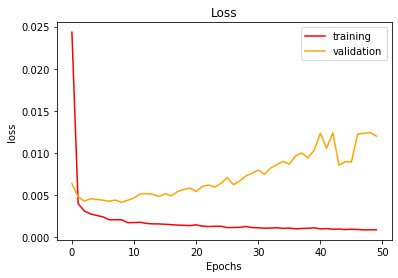

In [18]:
epochs = history.epoch

loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

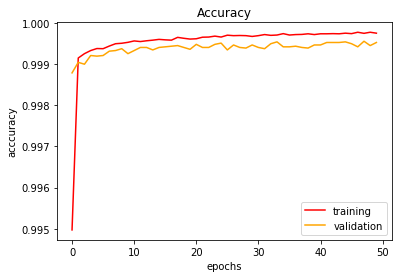

In [19]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [20]:
y_predicted = model.predict(X_test)

In [21]:
loss_v, acc_v = model.evaluate(X_test, y_test)

163027/163027 [==============================] - 33s 201us/step


In [22]:
loss_v

0.002018726358672578

In [23]:
acc_v

0.9996013045310974

In [24]:
loss_t, acc_t = model.evaluate(X_train, y_train)

330994/330994 [==============================] - 63s 189us/step


In [25]:
loss_t

0.0030321228585186914

In [26]:
acc_t

0.9997643232345581

In [28]:
y_predicted = [int(prediction >= 0.5) for prediction in y_predicted]

In [31]:
np.bincount(y_predicted)

array([ 32115, 130912])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(confusion_matrix(y_predicted, y_test))

[[ 32076     39]
 [    26 130886]]


In [37]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32115
           1       1.00      1.00      1.00    130912

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027

